<center><h1> Reinforcement Learning Lab Problem Sheet - 2 - Bandit Algorithms</h1></center>
<hr><font size=4>
1. Incremental Uniform. This algorithm repeatedly loops through the arms
pulling each arm once each time through the loop. The number of pulls for any
two arms will never differ by more than 1. The average rewards for each arm
are tracked and for the simple regret objective, the arm with the best average
reward is returned as the best arm.</font>

In [ ]:
#Importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Arm:
  '''
  Class to define the nature of arm
  reward distribution etc
  '''
  def __init__(self,mean=None,std=None,distribution=None):
    '''
    Constructor function to define class members
    :params None
    :return None
    '''
    #Characteristics of distribution
    if mean!=None and std!=None and distribution!=None:
      self.mean = mean
      self.std = std
      self.reward_distribution = distribution

    else:
      self.mean = random.randint(1,10) #Mean of the distribution
      self.std = random.randint(1,100)
      self.reward_distribution = random.choice(['normal','uniform'])

    #choosing the distribution
    self.Qt = 0 #running average of the rewards
    self.t = 0 #tracking the time steps

  def simulate(self):
    '''
    Simulate trials for arm
    :params None
    :return None
    '''
    #Drawing a sample from the reward distribution
    if self.reward_distribution=='normal':
      reward = np.random.normal(self.mean,self.std)
    elif self.reward_distribution == 'poisson':
      reward = np.random.poisson(1/(self.mean))
    else:+
      reward = np.random.uniform(min(self.mean,self.std),max(self.mean,self.std)+1)

    print("Reward:",round(reward,3)," Qt at time step:",self.t,"is:",round(self.Qt,3))

    #updating the running average and time steps
    self.Qt = self.Qt + ((1/(self.t+1))*(reward - self.Qt))
    self.t +=1

In [ ]:
num_arms   = int(input("Enter no of arms you want to play with:"))

#maintaining the count of each arm is picked to ensure The number of pulls for any two arms will never differ by more than 1.
count_tracker = {}
for arm in range(num_arms):
  count_tracker[arm] = 0

#creating objects aka initalising reward dstribution to each arm
bandit_arms = []
for arm in range(num_arms):
  bandit_arms.append(Arm())

time_steps = int(input("No of time steps to simulate:"))
print()
for time_step_i in range(time_steps):

  if time_step_i == 0: #at time step zero i choose a arm randomly
    arm = random.choice([i for i in range(num_arms)])
    print("At time step:",time_step_i,"Choosen arm:",arm)
    bandit_arms[arm].simulate()
    count_tracker[arm] += 1
    print("-"*40)

  else: #for all other time steps i choose the arm with max qt - greedy strategy
    Qt_arms = np.array([arm.Qt for arm in bandit_arms])
    print(Qt_arms)
    max_Qt_idx = np.argmax(Qt_arms)

    #if all the arm played then set them to 0
    if sum(list(count_tracker.values())) == num_arms:
      for arm in range(num_arms):
        count_tracker[arm] = 0

    #if the max qt is already picked then choose any other arm randomly
    #in order to avoid number of pulls for any two arms will differing by more than 1.
    elif count_tracker[max_Qt_idx] == 1:
      while count_tracker[max_Qt_idx]==1:
        max_Qt_idx = random.choice([i for i in range(num_arms)])

    print("At time step:",time_step_i,"Choosen arm:",max_Qt_idx)
    bandit_arms[max_Qt_idx].simulate()
    count_tracker[max_Qt_idx] += 1
    print("-"*40)

Enter no of arms you want to play with:3
No of time steps to simulate:10

At time step: 0 Choosen arm: 1
Reward: 42.761  Qt at time step: 0 is: 0
----------------------------------------
[ 0.         42.76076006  0.        ]
At time step: 1 Choosen arm: 2
Reward: 75.956  Qt at time step: 0 is: 0
----------------------------------------
[ 0.         42.76076006 75.95559035]
At time step: 2 Choosen arm: 0
Reward: 30.936  Qt at time step: 0 is: 0
----------------------------------------
[30.93594435 42.76076006 75.95559035]
At time step: 3 Choosen arm: 2
Reward: 17.093  Qt at time step: 1 is: 75.956
----------------------------------------
[30.93594435 42.76076006 46.52429326]
At time step: 4 Choosen arm: 0
Reward: 18.464  Qt at time step: 1 is: 30.936
----------------------------------------
[24.69989618 42.76076006 46.52429326]
At time step: 5 Choosen arm: 1
Reward: 27.038  Qt at time step: 1 is: 42.761
----------------------------------------
[24.69989618 34.89962527 46.52429326]
At ti

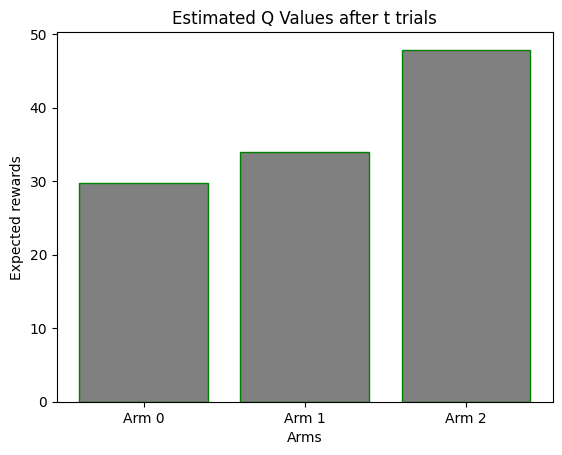

In [ ]:
plt.bar([i for i in range(num_arms)],[arm.Qt for arm in bandit_arms],color=tuple([0.5]*3),edgecolor='green')
plt.xlabel("Arms")
plt.ylabel("Expected rewards")
plt.title("Estimated Q Values after t trials")
plt.xticks(range(num_arms), ['Arm {}'.format(i) for i in range(num_arms)])
plt.show()

In [ ]:
params = [(arm.mean,arm.std,arm.reward_distribution) for arm in bandit_arms]
print(params)

[(1, 54, 'uniform'), (10, 67, 'uniform'), (3, 87, 'uniform')]


<hr><font size=4>
2. (ε) epsilon-Greedy. This is the -Greedy algorithm from the course notes,
where 0 &lt; ε &lt; 1 is a parameter to the algorithm. The arm that currently looks
best is selected with probability and otherwise a random arm is selected from
among the other arms. Note that if there are k arms, then the (1/k)-Greedy
algorithm will behave very much like Incremental Uniform, it is just a
randomized version of that approach.</font>

In [ ]:
eps   = float(input("Enter epsilon:"))
mnstd = True
if mnstd:
  #creating objects aka initalising reward dstribution to each arm
  num_arms   = len(params)
  bandit_arms = []
  for arm in range(num_arms):
    bandit_arms.append(Arm(params[arm][0],params[arm][1],params[i][2]))
else:
  num_arms   = int(input("Enter no of arms you want to play with:"))
  bandit_arms = []
  for arm in range(num_arms):
    bandit_arms.append(Arm())

time_steps = int(input("No of time steps to simulate:"))
print()
for time_step_i in range(time_steps):

  if time_step_i == 0: #at time step zero i choose a arm randomly
    arm = random.choice([i for i in range(num_arms)])
    print("At time step:",time_step_i,"Choosen arm:",arm)
    bandit_arms[arm].simulate()
    print("-"*40)

  else: #for all other time steps i choose the arm with max qt - greedy strategy
    probability_eps = random.randrange(1)
    Qt_arms = np.array([arm.Qt for arm in bandit_arms])
    print(Qt_arms)
    if probability_eps>=eps:
      max_Qt_idx = np.argmax(Qt_arms)
    else:
        max_Qt_idx = random.choice([i for i in range(num_arms)])

    print("At time step:",time_step_i,"Choosen arm:",max_Qt_idx)
    bandit_arms[max_Qt_idx].simulate()
    print("-"*40)

Enter epsilon:0.6
No of time steps to simulate:10

At time step: 0 Choosen arm: 1
Reward: 29.397  Qt at time step: 0 is: 0
----------------------------------------
[ 0.         29.39727934  0.        ]
At time step: 1 Choosen arm: 0
Reward: 22.284  Qt at time step: 0 is: 0
----------------------------------------
[22.28389974 29.39727934  0.        ]
At time step: 2 Choosen arm: 1
Reward: 11.958  Qt at time step: 1 is: 29.397
----------------------------------------
[22.28389974 20.67778806  0.        ]
At time step: 3 Choosen arm: 0
Reward: 24.795  Qt at time step: 1 is: 22.284
----------------------------------------
[23.53946612 20.67778806  0.        ]
At time step: 4 Choosen arm: 1
Reward: 24.753  Qt at time step: 2 is: 20.678
----------------------------------------
[23.53946612 22.03605479  0.        ]
At time step: 5 Choosen arm: 0
Reward: 34.857  Qt at time step: 2 is: 23.539
----------------------------------------
[27.31188034 22.03605479  0.        ]
At time step: 6 Choosen

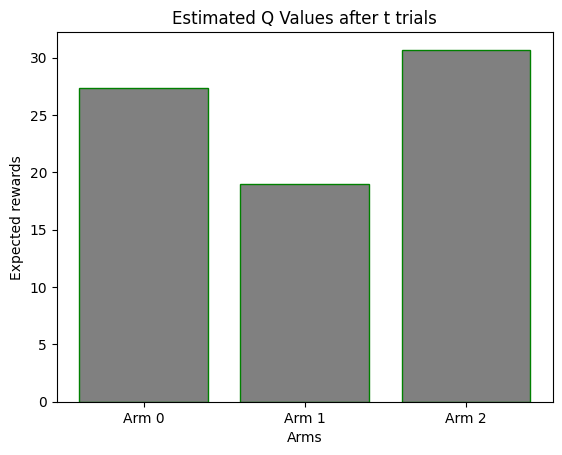

In [ ]:
plt.bar([i for i in range(num_arms)],[arm.Qt for arm in bandit_arms],color=tuple([0.5]*num_arms),edgecolor='green')
plt.xlabel("Arms")
plt.ylabel("Expected rewards")
plt.title("Estimated Q Values after t trials")
plt.xticks(range(num_arms), ['Arm {}'.format(i) for i in range(num_arms)])
plt.show()

<hr><font size=4>
3. UCB. This is the UCB algorithm from the notes. In the case of simple regret,
when asked to return the best arm, UCB returns the arm that accumulated the
largest average reward (it ignores the exploration term of the UCB rule for
picking the best arm).</font>

In [ ]:
c = float(input("Enter constant c of UCB value:"))

#creating objects aka initalising reward dstribution to each arm
mnstd = True
if mnstd:
  num_arms   = len(params)
  #creating objects aka initalising reward dstribution to each arm
  bandit_arms = []
  for arm in range(num_arms):
    bandit_arms.append(Arm(params[arm][0],params[arm][1],params[i][2]))
else:
  num_arms   = int(input("Enter no of arms you want to play with:"))
  bandit_arms = []
  for arm in range(num_arms):
    bandit_arms.append(Arm())

#maintaining the count of each arm is picked
count_tracker = {}
for arm in range(num_arms):
  count_tracker[arm] = 0

time_steps = int(input("No of time steps to simulate:"))
print()
for time_step_i in range(time_steps):

  if time_step_i == 0: #at time step zero i choose a arm randomly
    for arm in range(num_arms):
      bandit_arms[arm].simulate()
      count_tracker[arm] += 1
      print("-"*40)

  else: #for all other time steps i choose the arm with max qt - greedy strategy
    Qt_arms = np.array([arm.Qt for arm in bandit_arms])
    for i in range(len(Qt_arms)):
      Qt_arms[i] = Qt_arms[i] + c*((np.log(time_step_i)/count_tracker[i])**0.5)

    print(Qt_arms)
    max_Qt_idx = np.argmax(Qt_arms)

    print("At time step:",time_step_i,"Choosen arm:",max_Qt_idx)
    bandit_arms[max_Qt_idx].simulate()
    count_tracker[max_Qt_idx] += 1
    print("-"*40)

Enter constant c of UCB value:0.2
No of time steps to simulate:10

Reward: 26.797  Qt at time step: 0 is: 0
----------------------------------------
Reward: 57.882  Qt at time step: 0 is: 0
----------------------------------------
Reward: 83.467  Qt at time step: 0 is: 0
----------------------------------------
[26.79673634 57.88241415 83.46660555]
At time step: 1 Choosen arm: 2
Reward: 61.064  Qt at time step: 1 is: 83.467
----------------------------------------
[26.96324726 58.04892507 72.38322595]
At time step: 2 Choosen arm: 2
Reward: 71.023  Qt at time step: 2 is: 72.265
----------------------------------------
[27.00636575 58.09204356 71.97247371]
At time step: 3 Choosen arm: 2
Reward: 59.212  Qt at time step: 3 is: 71.851
----------------------------------------
[27.03221834 58.11789615 68.80925641]
At time step: 4 Choosen arm: 2
Reward: 4.874  Qt at time step: 4 is: 68.692
----------------------------------------
[27.05046359 58.1361414  56.04141503]
At time step: 5 Choosen ar

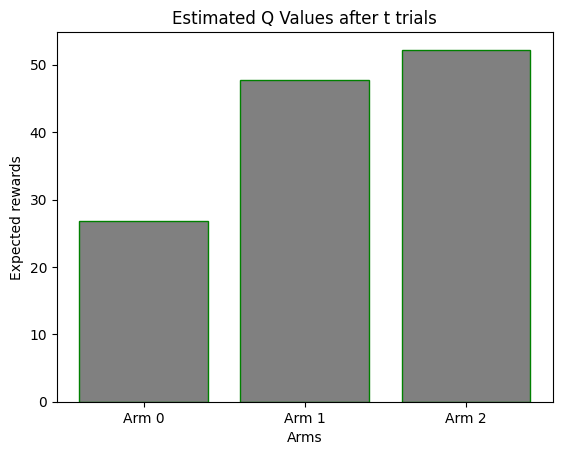

In [ ]:
plt.bar([i for i in range(num_arms)],[arm.Qt for arm in bandit_arms],color=tuple([0.5]*num_arms),edgecolor='green')
plt.xlabel("Arms")
plt.ylabel("Expected rewards")
plt.title("Estimated Q Values after t trials")
plt.xticks(range(num_arms), ['Arm {}'.format(i) for i in range(num_arms)])
plt.show()

<hr>
<hr>